# Read and load results

In [142]:
from functions import *
from Classes import *

# Define the use technologies and regions(s)
region = 'ESP'  
setup_exp = {
    f'{region}': {
        'OCGT': True,
        'CCGT': False,
        'battery storage': True,
        'onwind': True,
        'offwind': False,
        'solar': True,
        'electrolysis': True,
        'fuel cell': True,
        'Hydrogen storage': True,
        'Reservoir hydro storage': True,
        'load shedding': False
    }
}

# Default weather, hydro and demand years
w_year_exp = 2011
h_year_exp = 2007
d_year_exp = 2018

# Dispatch and rolling horizon settings
w_year_dispatch = 2017
h_year_dispatch = 2007
d_year_dispatch = 2019

weather_years = All_data['solar'].index.year.unique()


In [135]:
folder_exp_1 = f"N_EXP_d_{d_year_exp}_h_{h_year_exp}"
folder_exp_2 = f"N_EXP_d_{d_year_exp}_h_{h_year_exp}_gas_noise2"

networks_exp_1 = load_networks(folder_name = folder_exp_1, weather_years = weather_years)
networks_exp_2 = load_networks(folder_name = folder_exp_2, weather_years = weather_years)

Loaded N_1979 from N_w-1979_d-2018_h-2007_ESP.nc
Loaded N_1980 from N_w-1980_d-2018_h-2007_ESP.nc
Loaded N_1981 from N_w-1981_d-2018_h-2007_ESP.nc
Loaded N_1982 from N_w-1982_d-2018_h-2007_ESP.nc
Loaded N_1983 from N_w-1983_d-2018_h-2007_ESP.nc
Loaded N_1984 from N_w-1984_d-2018_h-2007_ESP.nc
Loaded N_1985 from N_w-1985_d-2018_h-2007_ESP.nc
Loaded N_1986 from N_w-1986_d-2018_h-2007_ESP.nc
Loaded N_1987 from N_w-1987_d-2018_h-2007_ESP.nc
Loaded N_1988 from N_w-1988_d-2018_h-2007_ESP.nc
Loaded N_1989 from N_w-1989_d-2018_h-2007_ESP.nc
Loaded N_1990 from N_w-1990_d-2018_h-2007_ESP.nc
Loaded N_1991 from N_w-1991_d-2018_h-2007_ESP.nc
Loaded N_1992 from N_w-1992_d-2018_h-2007_ESP.nc
Loaded N_1993 from N_w-1993_d-2018_h-2007_ESP.nc
Loaded N_1994 from N_w-1994_d-2018_h-2007_ESP.nc
Loaded N_1995 from N_w-1995_d-2018_h-2007_ESP.nc
Loaded N_1996 from N_w-1996_d-2018_h-2007_ESP.nc
Loaded N_1997 from N_w-1997_d-2018_h-2007_ESP.nc
Loaded N_1998 from N_w-1998_d-2018_h-2007_ESP.nc
Loaded N_1999 from N

In [143]:
folder_exp_3 = f"N_EXP_d_{d_year_exp}_h_{h_year_exp}_2BS_hSPC"
networks_exp_3 = load_networks(folder_name = folder_exp_3, weather_years = weather_years)

Loaded N_1979 from N_w-1979_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1980 from N_w-1980_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1981 from N_w-1981_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1982 from N_w-1982_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1983 from N_w-1983_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1984 from N_w-1984_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1985 from N_w-1985_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1986 from N_w-1986_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1987 from N_w-1987_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1988 from N_w-1988_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1989 from N_w-1989_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1990 from N_w-1990_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1991 from N_w-1991_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1992 from N_w-1992_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1993 from N_w-1993_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1994 from N_w-1994_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1995 from N_w-1995_d-2018_h-2007_ESP_2BS_hSPC.nc
Loaded N_1996 

## Comparing two networks SKAL ÆNDRES FOR AT VIRKE - skal slå op på network[year] i stedet for pr navn

In [ ]:
if len(networks_exp_1) != len(networks_exp_2):
    print("Warning: The number of loaded exp_1 and exp_2 networks do not match!")

results = []
for i, (name_exp_1, name_exp_2) in enumerate(zip(names_exp_1, names_exp_2)):
    net_exp_1 = networks_exp_1[name_exp_1]
    net_exp_2 = networks_exp_2[name_exp_2]

    exp_1_cost = (net_exp_1.buses_t['marginal_price']["electricity bus"].values *
                  net_exp_1.loads_t['p_set']['load']).sum() / 1e6
    exp_2_cost = (net_exp_2.buses_t['marginal_price']["electricity bus"].values *
                  net_exp_2.loads_t['p_set']['load']).sum() / 1e6
    diff = exp_2_cost - exp_1_cost

    ls_exp_1 = ((net_exp_1.generators_t.p["Load shedding"] *
                 net_exp_1.generators.at["Load shedding", "marginal_cost"]).sum() / 1e6
                if "Load shedding" in net_exp_1.generators.index else 0.0)

    ls_exp_2 = ((net_exp_2.generators_t.p["Load shedding"] *
                 net_exp_2.generators.at["Load shedding", "marginal_cost"]).sum() / 1e6
                if "Load shedding" in net_exp_2.generators.index else 0.0)

    obj_exp_1 = round(net_exp_1.objective/1e6,2)
    obj_exp_2 = round(net_exp_2.objective/1e6,2)

    results.append({
        'pair_idx': i,
        'exp_1_key': name_exp_1,
        'exp_2_key': name_exp_2,
        'exp_1_objective [mEUR]': obj_exp_1,
        'exp_2_objective [mEUR]': obj_exp_2,
        'Objective_Difference [mEUR]': round(obj_exp_2 - obj_exp_1, 1),
        'exp_1_cost [mEUR]': round(exp_1_cost, 1),
        'exp_2_cost [mEUR]': round(exp_2_cost, 1),
        'Cost_Difference [mEUR]': round(diff, 1),
        'exp_1_Load_shedding_cost [mEUR]': round(ls_exp_1, 1),
        'exp_2_Load_shedding_cost [mEUR]': round(ls_exp_2, 1)
        
    })

results_df = pd.DataFrame(results)
results_df

In [ ]:
def calculate_cost_recovery_2_networks(network_exp_1, network_exp_2):
    results = []

    for model_label, network in zip(["exp_1", "exp_2"], [network_exp_1, network_exp_2]):

        # Generators
        for gen in network.generators.index:
            carrier = network.generators.at[gen, "carrier"]
            bus = network.generators.at[gen, "bus"]
            p_nom = network.generators.at[gen, "p_nom"]
            marginal_cost = network.generators.at[gen, "marginal_cost"]
            capital_cost = 0 if gen == "load_shedding" else network.generators.at[gen, "capital_cost"]

            dispatch = network.generators_t.p[gen]
            prices = network.buses_t.marginal_price[bus]

            revenue = (dispatch * prices).sum()
            production_cost = (dispatch * marginal_cost).sum()
            capex = p_nom * capital_cost
            profit = revenue - (capex + production_cost)

            results.append({
                "Model": model_label,
                "name": gen,
                "carrier": carrier,
                "revenue [MEUR]": round(revenue / 1e6, 1),
                "production cost [MEUR]": round(production_cost / 1e6, 1),
                "capital cost [MEUR]": round(capex / 1e6, 1),
                "total cost [MEUR]": round((production_cost + capex) / 1e6, 1),
                "profit [MEUR]": round(profit / 1e6, 1)
            })

        # Storage Units
        for su in network.storage_units.index:
            carrier = network.storage_units.at[su, "carrier"]
            bus = network.storage_units.at[su, "bus"]
            p_nom = network.storage_units.at[su, "p_nom"]
            capital_cost = network.storage_units.at[su, "capital_cost"]

            dispatch = network.storage_units_t.p_dispatch[su]
            prices = network.buses_t.marginal_price[bus]

            revenue = (dispatch * prices).sum()
            marginal_cost = network.storage_units.at[su, "marginal_cost"]
            production_cost = (dispatch * marginal_cost).sum()
            capex = p_nom * capital_cost
            profit = revenue - (capex + production_cost)

            results.append({
                "Model": model_label,
                "name": su,
                "carrier": carrier,
                "revenue [MEUR]": round(revenue / 1e6, 1),
                "production cost [MEUR]": round(production_cost / 1e6, 1),
                "capital cost [MEUR]": round(capex / 1e6, 1),
                "total cost [MEUR]": round((production_cost + capex) / 1e6, 1),
                "profit [MEUR]": round(profit / 1e6, 1)
            })

    return pd.DataFrame(results)


# Run new results 

In [25]:
from functions import *
from Classes import *

# Define the use technologies and regions(s)
region = 'ESP'  
setup_exp = {
    f'{region}': {
        'OCGT': True,
        'CCGT': False,
        'battery storage': False,
        'onwind': True,
        'offwind': False,
        'solar': True,
        'electrolysis': True,
        'fuel cell': True,
        'Hydrogen storage': True,
        'Reservoir hydro storage': False,
        'load shedding': False
    }
}

# Default weather, hydro and demand years
w_year_exp = 2011
h_year_exp = 2007
d_year_exp = 2018

# Dispatch and rolling horizon settings
w_year_dispatch = 2017
h_year_dispatch = 2007
d_year_dispatch = 2019

weather_years = All_data['solar'].index.year.unique()


In [26]:
N_exp_class = Build_network_capacity_exp(setup=setup_exp,
                                  weather_year=w_year_exp,
                                  hydro_year=h_year_exp,
                                  demand_year=d_year_exp,
                                  data=All_data,
                                  cost_data=Cost)
N_exp = N_exp_class.network

silent_optimize(N_exp)
print_Results(N_exp)

Writing continuous variables.: 100%|██████████| 7/7 [00:00<00:00, 41.04it/s]



Objective value (MEUR): 16895

Installed generator capacities (MW):
Generator
OCGT      40513.0
onwind     2266.0
solar     55430.0

Installed store energy capacities (MWh):
Store
Hydrogen storage    0.0

Installed hydro power capacity (MW):
Series([], )

Installed link power capacities (MW):
Link
electrolysis    0.0
fuel cell       0.0


In [10]:
co2_emissions_gas = Cost.costs.at["gas", "CO2 intensity"]
ocgt_efficiency = Cost.costs.at["OCGT", "efficiency"]

print(f"CO2 emissions for gas: {co2_emissions_gas}")
print(f"Efficiency of OCGT generator: {ocgt_efficiency}")

CO2 emissions for gas: 0.198
Efficiency of OCGT generator: 0.405


In [11]:
total_demand = All_data['demand'].loc[All_data['demand'].index.year == d_year_exp, region].sum()
print(f"Total demand in {region} for year {d_year_exp}: {total_demand:.2f} MWh")

Total demand in ESP for year 2018: 254608551.50 MWh


In [15]:
max_gas_allowance = (total_demand * 0.05)/ ocgt_efficiency
print(f"Max gas allowance for 5% emissions: {max_gas_allowance:.2f} MWh")
co2_budget = max_gas_allowance * co2_emissions_gas
print(f"CO2 budget for 5% emissions: {co2_budget:.2f} tons")

Max gas allowance for 5% emissions: 31433154.51 MWh
CO2 budget for 5% emissions: 6223764.59 tons


In [42]:
N_exp_class = Build_network_capacity_exp(setup=setup_exp,
                                  weather_year=1996,
                                  hydro_year=h_year_exp,
                                  demand_year=d_year_exp,
                                  data=All_data,
                                  cost_data=Cost)
N_exp = N_exp_class.network
N_exp.add(
    "GlobalConstraint",
    "emission_limit",
    carrier_attribute="co2_emissions",
    sense="<=",
    constant=co2_budget*0.40,
)
silent_optimize(N_exp)
print_Results(N_exp)

Writing continuous variables.: 100%|██████████| 7/7 [00:00<00:00, 38.27it/s]



Objective value (MEUR): 21279

Installed generator capacities (MW):
Generator
OCGT       26124.0
onwind    146124.0
solar      22503.0

Installed store energy capacities (MWh):
Store
Hydrogen storage    1452146.0

Installed hydro power capacity (MW):
Series([], )

Installed link power capacities (MW):
Link
electrolysis    2490.0
fuel cell       4237.0


# Build df and tables to store results

In [36]:

result_name = "optimized_capacities_exp_model_d2018_h2007_hMC.csv"
opt_capa_df = pd.read_csv(f"Results/{result_name}", header=[0,1], index_col=0).round(2)
opt_capa_df

generators                              links                    \
           OCGT    onwind     solar battery charge battery discharge   
mean   20732.16  55555.44  22786.44         427.19           1345.39   
std     2165.99  12678.46   9571.02         170.73            445.23   
min    15885.37   3357.80  11732.57         178.72            651.15   
25%    19492.37  54859.92  16670.11         299.23           1034.77   
50%    20642.31  59283.81  20691.26         414.26           1325.46   
75%    22179.64  63048.92  24063.51         524.08           1522.44   
max    26979.61  66609.87  55213.58         802.52           2393.16   

                                     stores                   
     electrolysis fuel cell battery storage Hydrogen storage  
mean          0.0       0.0         2212.59              0.0  
std           0.0       0.0         1009.13              0.0  
min           0.0       0.0          765.63              0.0  
25%           0.0       0.0         1519.77              0.0  
50%           0.0       0.0         2177.38              0.0  
75%           0.0       0.0         2634.35              0.0  
max           0.0       0.0         4598.44              0.0

In [141]:
result_name_gas_noise = "optimized_capacities_exp_model_d2018_h2007_gas_noise2.csv"
opt_capa_df_gas_noise = pd.read_csv(f"Results/{result_name_gas_noise}", header=[0,1], index_col=0).round(2)
opt_capa_df_gas_noise

generators                              links                    \
           OCGT    onwind     solar battery charge battery discharge   
mean   18706.65  62969.76  23529.43        1443.98           2945.54   
std     2087.44   7734.92   7825.20        1058.60           1517.94   
min    14265.70  35466.09  13395.77         329.16           1002.80   
25%    17925.54  59986.85  18411.68         647.41           1681.46   
50%    18717.29  64529.42  21781.38        1167.79           2675.14   
75%    20159.50  68115.09  24637.17        1961.72           3964.98   
max    22681.77  75212.03  44481.79        5599.16           7932.97   

                                     stores                   
     electrolysis fuel cell battery storage Hydrogen storage  
mean          0.0       0.0         7422.78              0.0  
std           0.0       0.0         5255.73              0.0  
min           0.0       0.0         1571.74              0.0  
25%           0.0       0.0         3469.71              0.0  
50%           0.0       0.0         5927.70              0.0  
75%           0.0       0.0        10212.54              0.0  
max           0.0       0.0        27105.11              0.0

In [40]:
print("Difference in optimized capacities between exp_model_d2018_h2007_ and exp_model_d2018_h2007_gas_noise:")
round(opt_capa_df-opt_capa_df_gas_noise,1)

generators                          links                                 \
           OCGT  onwind   solar battery charge battery discharge electrolysis   
mean       65.9  -654.5    80.1          -17.3             -23.9          0.0   
std        16.4   903.3   377.5          -10.3             -12.8          0.0   
min        40.6 -6501.8  -157.3          -10.8               1.8          0.0   
25%        48.2  -444.0   -26.9           -0.8               1.9          0.0   
50%        81.7  -595.4  -145.3           -8.4              -8.5          0.0   
75%        46.6  -208.2   -12.2          -11.9             -22.6          0.0   
max       279.6  -659.1  2511.1          -27.8             -17.4          0.0   

                        stores                   
     fuel cell battery storage Hydrogen storage  
mean       0.0           -65.1              0.0  
std        0.0           -37.2              0.0  
min        0.0           -48.4              0.0  
25%        0.0            -2.0              0.0  
50%        0.0           -31.5              0.0  
75%        0.0            -6.6              0.0  
max        0.0           -28.3              0.0

In [145]:
results_exp_wo_LS = {
    "generators": pd.DataFrame(index=weather_years),
    "links": pd.DataFrame(index=weather_years),
    "stores": pd.DataFrame(index=weather_years),
}

for year in weather_years:
    net = networks_exp_3[year]

    # Store capacities (adjust columns as needed)
    gen = net.generators["p_nom_opt"].rename("p_nom_opt")
    links = net.links["p_nom_opt"].rename("p_nom_opt")
    stores = net.stores["e_nom_opt"].rename("e_nom_opt")

    results_exp_wo_LS["generators"].loc[year, gen.index] = gen.values
    results_exp_wo_LS["links"].loc[year, links.index] = links.values
    results_exp_wo_LS["stores"].loc[year, stores.index] = stores.values

# Save to CSV or analyze
results_df = pd.concat(results_exp_wo_LS, axis=1).round(2)



In [149]:
def basic_stats(df, save_path=None, as_columns=True):
    """
    Quick stats for results_df.
    - Columns will be flattened names like "generators__OCGT".
    - If as_columns=True (default) -> rows = stats, columns = components.
    - If as_columns=False -> rows = components, columns = stats (old behavior).
    """
    s = df.describe(percentiles=[.25, .5, .75]).loc[
        ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
    ]
    # flatten multiindex columns to e.g. "generators__OCGT"
    flat = ['__'.join(col) if isinstance(col, tuple) else str(col) for col in s.columns]
    s.columns = flat

    out = s if as_columns else s.T

    if save_path:
        out.to_csv(save_path)

    return out
stats = basic_stats(results_df, save_path="Results/exp_wo_LS_stats.csv", as_columns=True)


In [150]:
stats

,generators__OCGT,generators__onwind,generators__solar
mean,21498.797949,63221.838974,21471.429231
std,1781.602392,7845.443714,7092.245592
min,17111.630000,35535.350000,12329.840000
25%,20575.475000,60371.755000,16774.765000
50%,21567.820000,64297.590000,20286.260000
75%,22617.360000,68719.730000,23227.740000
max,25547.340000,75040.880000,40491.750000


## Functions to calc results skal opdateres

In [27]:
def calculate_cost_recovery(network, model_label="exp"):
    rows = []

    # Generators
    for gen in network.generators.index:
        carrier = network.generators.at[gen, "carrier"]
        bus = network.generators.at[gen, "bus"]
        p_nom = network.generators.at[gen, "p_nom"]
        mc = network.generators.at[gen, "marginal_cost"]
        capex_unit = 0 if carrier in {"load_shedding"} or gen == "load_shedding" else network.generators.at[gen, "capital_cost"]

        dispatch = network.generators_t.p[gen]
        price = network.buses_t.marginal_price[bus]

        revenue = (dispatch * price).sum()
        prod_cost = (dispatch * mc).sum()
        capex = p_nom * capex_unit
        profit = revenue - (capex + prod_cost)

        rows.append({
            "Model": model_label,
            "name": gen,
            "carrier": carrier,
            "revenue [MEUR]": round(revenue / 1e6, 1),
            "production cost [MEUR]": round(prod_cost / 1e6, 1),
            "capital cost [MEUR]": round(capex / 1e6, 1),
            "total cost [MEUR]": round((prod_cost + capex) / 1e6, 1),
            "profit [MEUR]": round(profit / 1e6, 1),
        })

    # Storage Units
    for su in network.storage_units.index:
        carrier = network.storage_units.at[su, "carrier"]
        bus = network.storage_units.at[su, "bus"]
        p_nom = network.storage_units.at[su, "p_nom"]
        mc = network.storage_units.at[su, "marginal_cost"]
        capex_unit = network.storage_units.at[su, "capital_cost"]

        dispatch = network.storage_units_t.p_dispatch[su]
        price = network.buses_t.marginal_price[bus]

        revenue = (dispatch * price).sum()
        prod_cost = (dispatch * mc).sum()
        capex = p_nom * capex_unit
        profit = revenue - (capex + prod_cost)

        rows.append({
            "Model": model_label,
            "name": su,
            "carrier": carrier,
            "revenue [MEUR]": round(revenue / 1e6, 1),
            "production cost [MEUR]": round(prod_cost / 1e6, 1),
            "capital cost [MEUR]": round(capex / 1e6, 1),
            "total cost [MEUR]": round((prod_cost + capex) / 1e6, 1),
            "profit [MEUR]": round(profit / 1e6, 1),
        })

    return pd.DataFrame(rows).reset_index(drop=True)


## Look at summary results

In [30]:
opt_capa_df

generators                              links                    \
           OCGT    onwind     solar battery charge battery discharge   
mean   20732.16  55555.44  22786.44         427.19           1345.39   
std     2165.99  12678.46   9571.02         170.73            445.23   
min    15885.37   3357.80  11732.57         178.72            651.15   
25%    19492.37  54859.92  16670.11         299.23           1034.77   
50%    20642.31  59283.81  20691.26         414.26           1325.46   
75%    22179.64  63048.92  24063.51         524.08           1522.44   
max    26979.61  66609.87  55213.58         802.52           2393.16   

                                     stores                   
     electrolysis fuel cell battery storage Hydrogen storage  
mean          0.0       0.0         2212.59              0.0  
std           0.0       0.0         1009.13              0.0  
min           0.0       0.0          765.63              0.0  
25%           0.0       0.0         1519.77              0.0  
50%           0.0       0.0         2177.38              0.0  
75%           0.0       0.0         2634.35              0.0  
max           0.0       0.0         4598.44              0.0

In [51]:
# Look at cost recovery for a specific network
calculate_cost_recovery(networks_exp_2[1995])

,Model,name,carrier,revenue [MEUR],production cost [MEUR],capital cost [MEUR],total cost [MEUR],profit [MEUR]
0,exp,OCGT,gas,4579.0,3576.1,0.0,3576.1,1002.9
1,exp,onwind,onwind,7083.8,230.2,0.0,230.2,6853.6
2,exp,solar,solar,1004.4,0.2,0.0,0.2,1004.1
3,exp,Reservoir hydro storage,hydro,2170.2,43.1,0.0,43.1,2127.1


In [76]:
results_df

generators                              links                    \
               OCGT    onwind     solar battery charge battery discharge   
utc_time                                                                   
1979       19991.66  60846.56  15630.57         432.75           1201.45   
1980       19463.56  63462.10  17430.85         286.75           1365.85   
1981       21664.61  57572.51  21004.60         292.07           1140.62   
1982       20853.87  63941.32  15300.51         400.61           1373.21   
1983       20973.18  54490.97  24141.72         178.72            853.37   
1984       15885.37  63430.06  14695.15         380.00           1455.91   
1985       18040.70  56964.45  23473.60         802.52           2393.16   
1986       18350.85  65058.41  13878.91         428.89           1333.11   
1987       23122.19  65767.35  11732.57         399.61           1519.27   
1988       20334.90  59524.30  20561.04         206.28            762.02   
1989       21550.34  54831.17  25422.89         213.85            651.15   
1990       20838.92  58790.19  21711.11         306.39            965.78   
1991       18978.83  61295.61  17719.04         768.61           2261.69   
1992       23943.71  53295.06  26243.63         190.30            815.28   
1993       22833.42  58115.95  22024.40         422.52           1325.46   
1994       21220.01  54888.67  22140.91         400.23           1181.38   
1995       20576.78  63788.97  15909.37         509.20           1567.26   
1996       19521.18  63590.43  14607.77         470.36           1589.62   
1997       20357.73  58178.79  23985.29         505.95           1314.77   
1998       20591.27  63601.38  18842.15         324.90           1214.67   
1999       16530.38  66609.87  12249.97         308.48           1374.21   
2000       18030.23  60379.74  19197.40         716.40           2176.37   
2001       17568.75  61595.63  17784.61         707.07           2100.48   
2002       19038.19  65219.09  13322.18         638.20           1832.17   
2003       22350.47  59794.18  20219.51         469.61           1337.76   
2004       20048.86  59283.81  20691.26         424.33           1464.91   
2005       20205.37  61450.26  18355.50         576.35           1773.36   
2006       20777.50  57772.31  22202.29         269.06           1066.63   
2007       23435.05  58728.17  21204.50         244.45           1043.50   
2008       21076.11  58085.03  22217.77         320.71           1323.23   
2009       20408.46  60817.11  18472.05         350.54           1084.05   
2010       18771.28  62667.78  15788.79         706.48           2251.98   
2011       26979.61   3357.80  55213.58         241.14            819.44   
2012       22727.22  32480.30  39999.19         414.26            981.65   
2013       20642.31  51781.85  28672.43         605.28           1525.60   
2014       22191.14  48617.74  30950.22         538.96           1341.21   
2015       23201.15  30814.42  43024.91         416.96            926.12   
2016       23311.16  34747.20  39937.99         200.43            736.62   
2017       22168.13  31025.58  42710.78         591.21           1026.04   

                                         stores                   
         electrolysis fuel cell battery storage Hydrogen storage  
utc_time                                                          
1979              0.0       0.0         2371.73              0.0  
1980              0.0       0.0         1383.48              0.0  
1981              0.0       0.0         1566.80              0.0  
1982              0.0       0.0         1912.91              0.0  
1983              0.0       0.0         1018.72              0.0  
1984              0.0       0.0         2177.38              0.0  
1985              0.0       0.0         4598.44              0.0  
1986              0.0       0.0         2209.36              0.0  
1987              0.0       0.0         2289.78              0.0  
1988        

In [99]:
N_cap_exp_unique_MP = {}
avg_unique_MP_list = []
for year in weather_years:
    net_name = networks_exp_2[year].name
    net = networks_exp_2[year]
    N_cap_exp_unique_MP[year] = net.buses_t.marginal_price["electricity bus"].unique().round(2)
    avg_unique_MP_list.append(len(N_cap_exp_unique_MP[year]))
    print(f"Unique marginal prices for {net_name}: {N_cap_exp_unique_MP[year]}")
print (f"Average number of unique marginal prices across all years: {sum(avg_unique_MP_list)/len(avg_unique_MP_list):.2f}")

Unique marginal prices for N_w-1979_d-2018_h-2007_ESP_hMC: [    1.51    65.42 12559.51 29329.15  7047.31    59.67     1.65    63.39
     1.65    34.12     2.58]
Unique marginal prices for N_w-1980_d-2018_h-2007_ESP_hMC: [    1.51    65.42    59.67 11248.35 28434.84  9252.78     1.65    32.72
    61.8     22.56]
Unique marginal prices for N_w-1981_d-2018_h-2007_ESP_hMC: [   65.42     1.51    59.67     1.65 11092.24 28372.05  9471.67    33.9
    61.17    14.95     1.81]
Unique marginal prices for N_w-1982_d-2018_h-2007_ESP_hMC: [    1.51    65.42    59.67     1.65  7277.1  29463.03 12183.22    71.73
    47.89     1.65    31.47]
Unique marginal prices for N_w-1983_d-2018_h-2007_ESP_hMC: [   65.42     1.51  8345.81 28873.59 11716.57    59.67     1.65    18.94
    21.41]
Unique marginal prices for N_w-1984_d-2018_h-2007_ESP_hMC: [   65.42     1.51    59.67     1.65 20518.86  3275.62    71.73    10.98
    38.22  8419.91     1.81]
Unique marginal prices for N_w-1985_d-2018_h-2007_ESP_hMC: [  

# Plot results

## Electricity mix

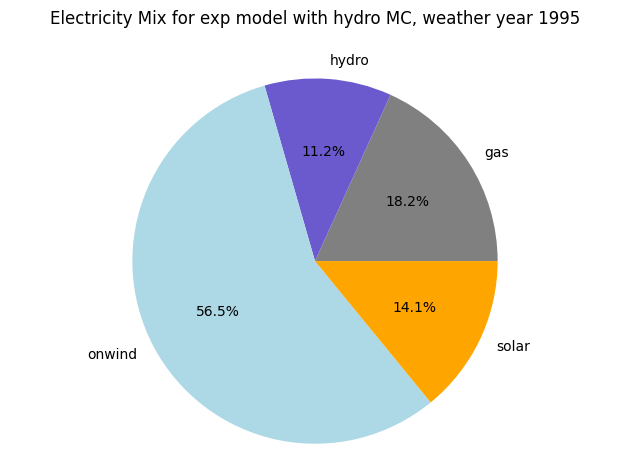

In [66]:
plot_electricity_mix(networks_exp_2[1995], plot_title="Electricity Mix for exp model with hydro MC, weather year 1995")

## Capacities plot

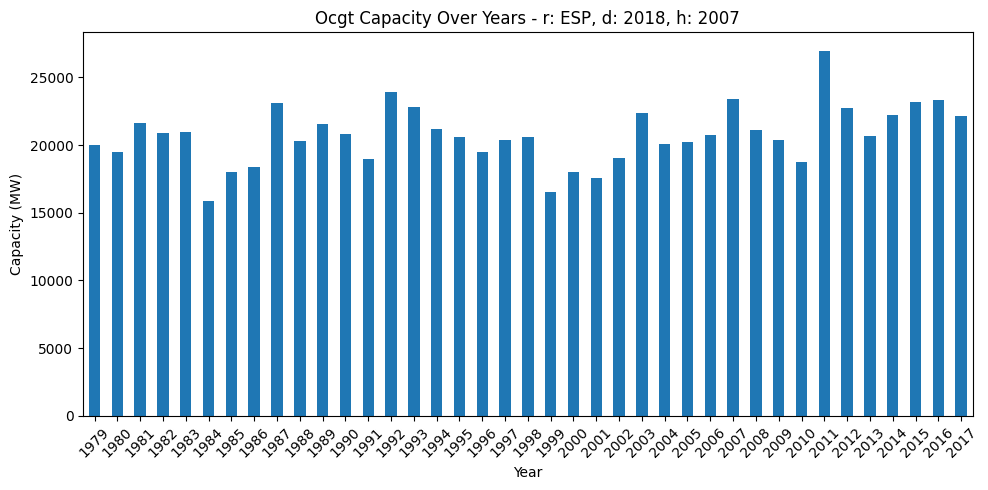

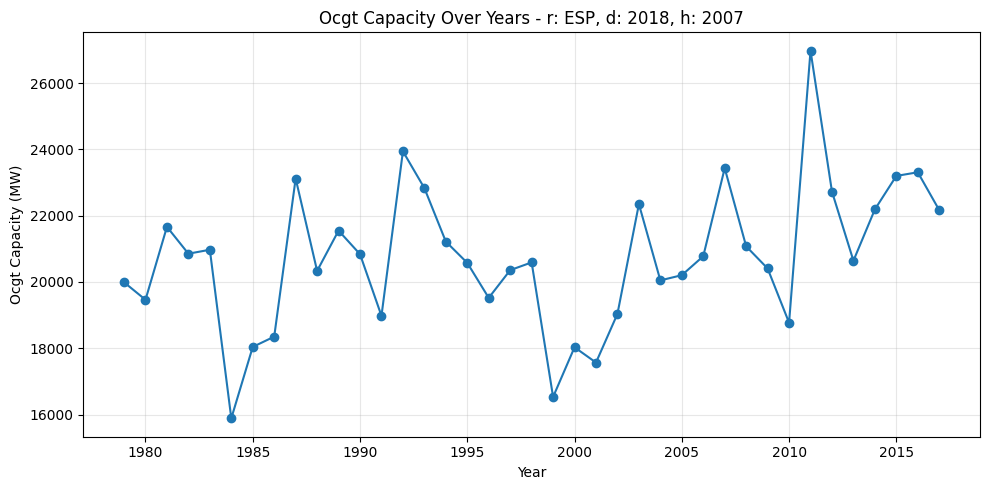

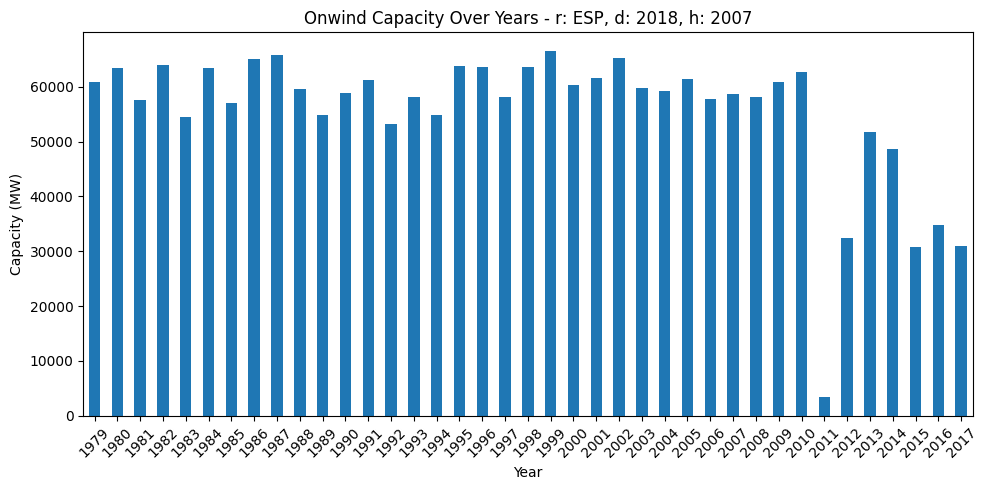

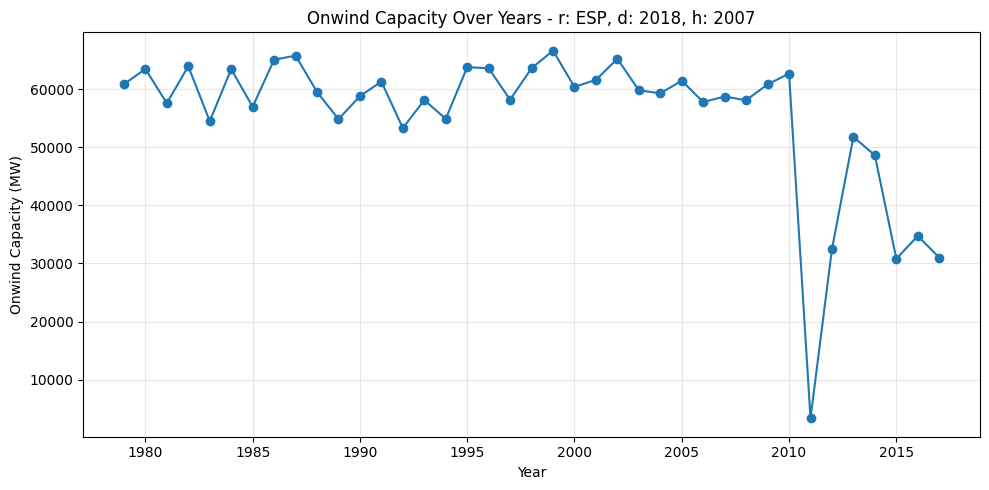

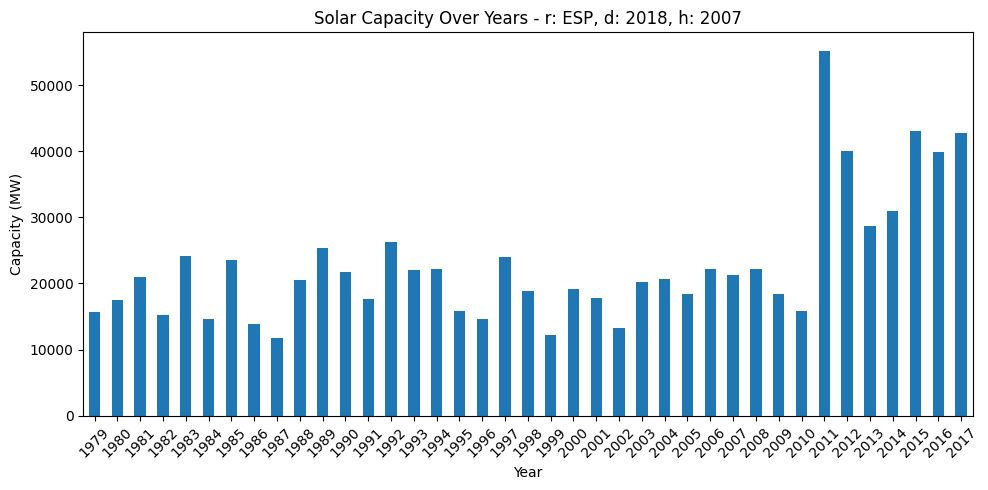

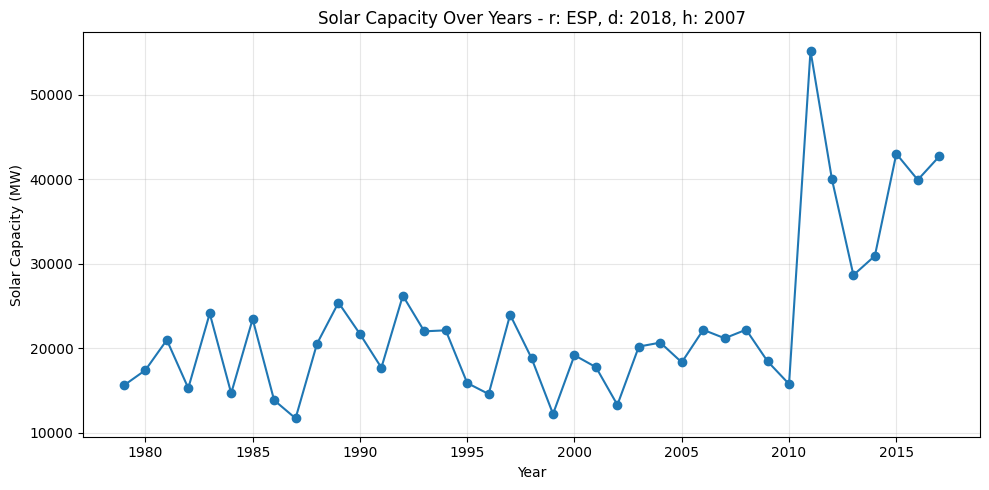

In [89]:
plot_generator_capacity(results_df, "OCGT", 'generators', region, d_year_exp, h_year_exp)
plot_generator_capacity(results_df, "onwind", 'generators', region, d_year_exp, h_year_exp)
plot_generator_capacity(results_df, "solar", 'generators', region, d_year_exp, h_year_exp)


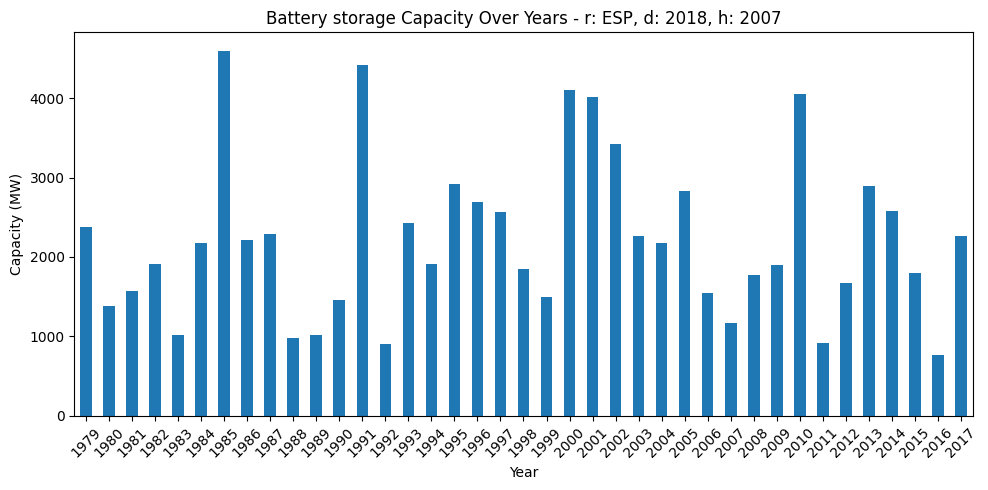

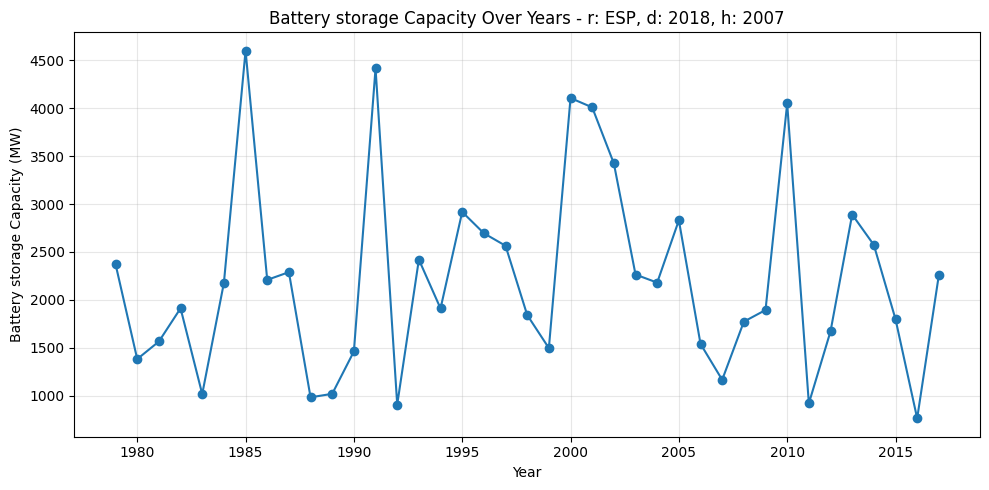

In [86]:
plot_generator_capacity(results_df, "battery storage", 'stores', region, d_year_exp, h_year_exp)


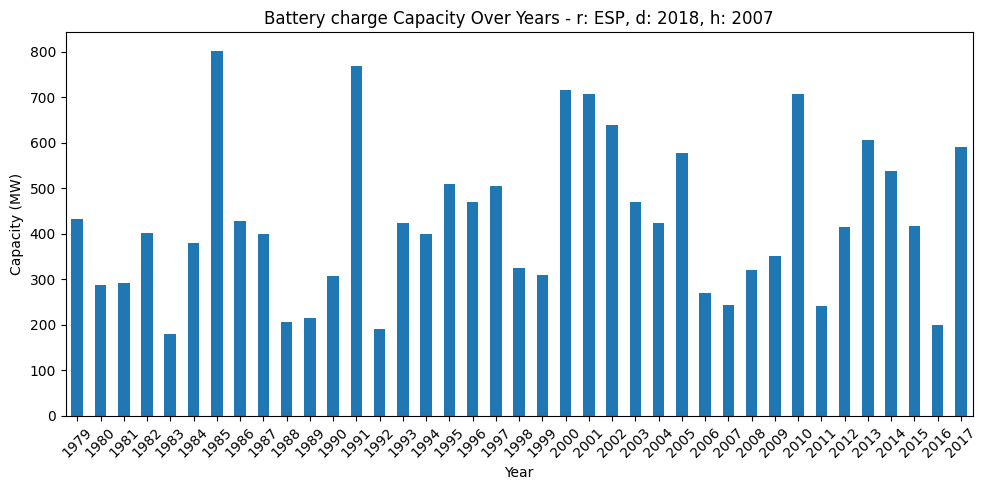

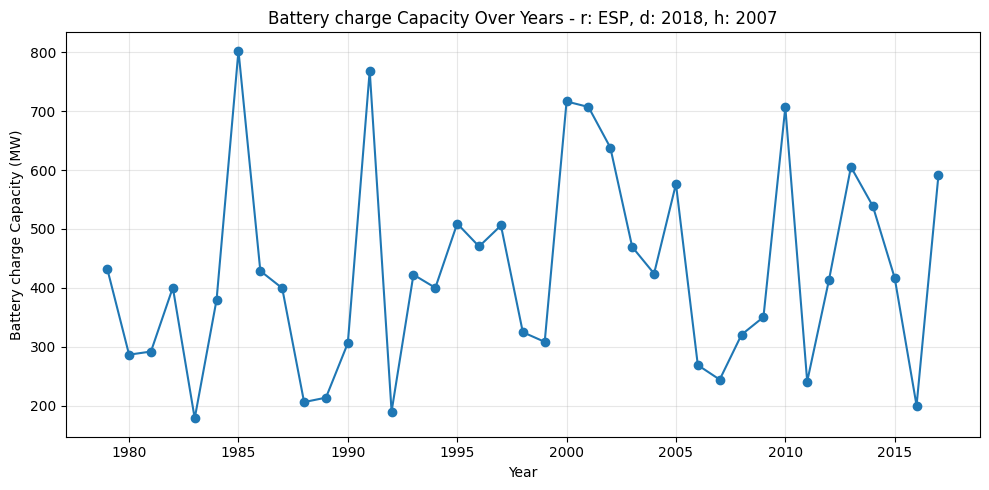

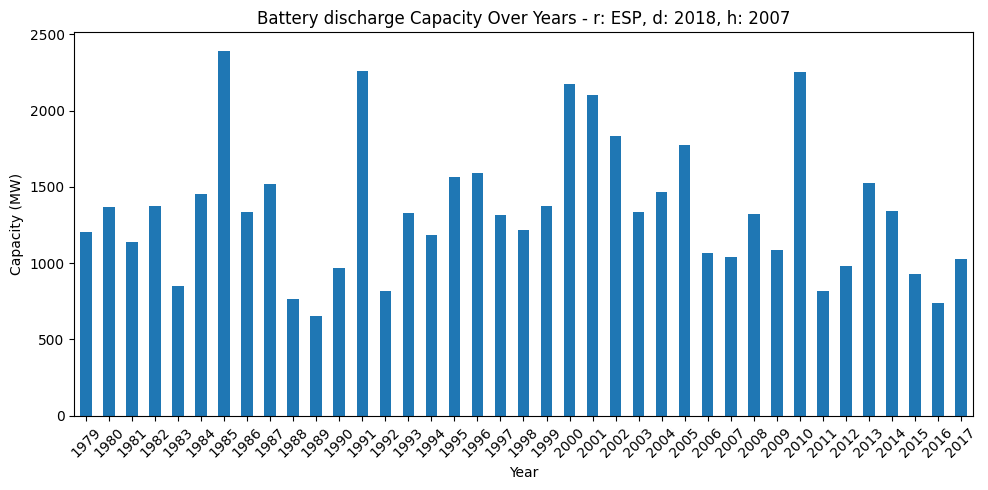

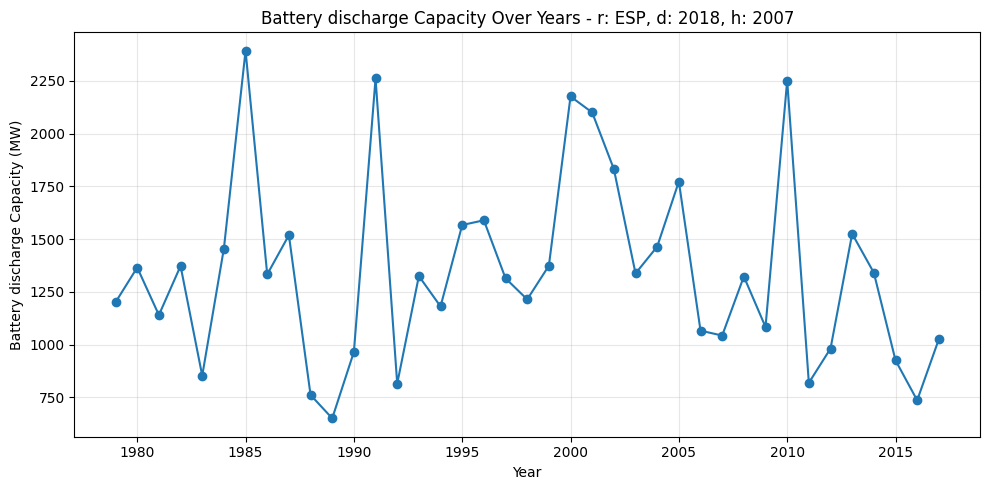

In [90]:
plot_generator_capacity(results_df, "battery charge", 'links', region, d_year_exp, h_year_exp)
plot_generator_capacity(results_df, "battery discharge", 'links', region, d_year_exp, h_year_exp)


## Marginal prices plot + weigthed prices

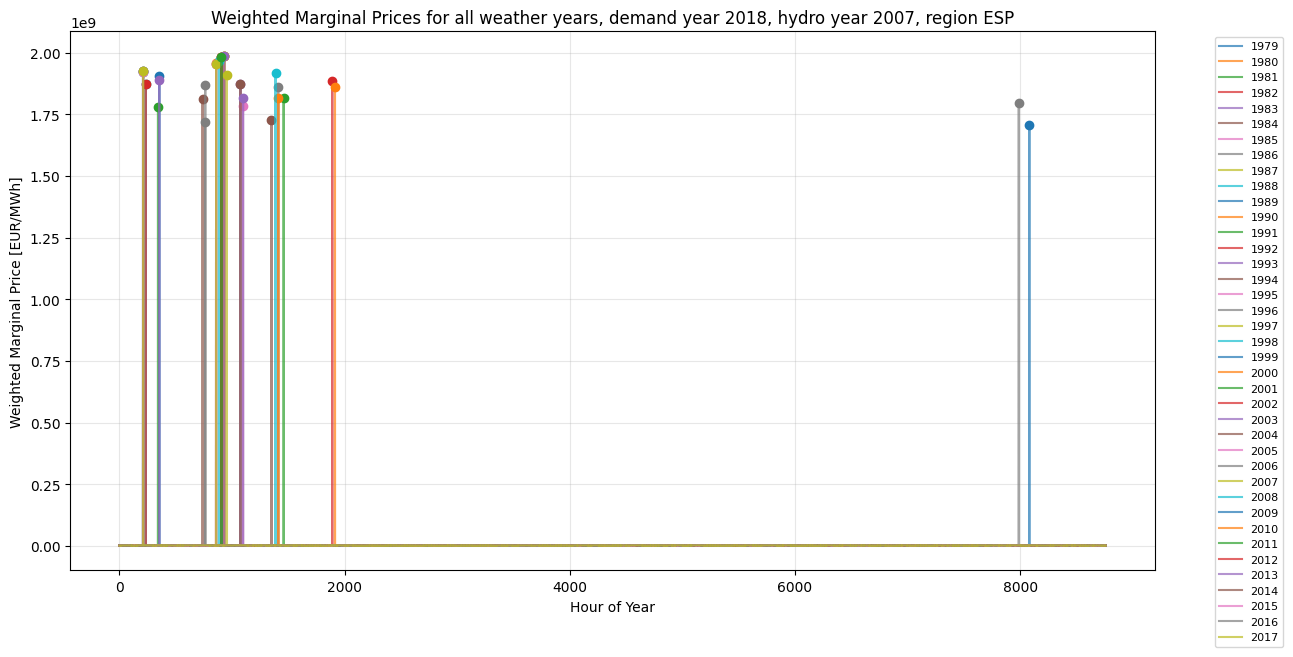

In [151]:
selected_network = networks_exp_3
max_weighted_price_list = []

plt.figure(figsize=(14, 7))
for i, year in enumerate(weather_years):
    if year in selected_network:
        net = selected_network[year]
        price = net.buses_t.marginal_price["electricity bus"]
        load = net.loads_t.p_set["load"]
        weights = load / load.sum()
        weighted_price_series = price * weights * load.sum()  # Restore original scale

        plt.plot(range(len(weighted_price_series)), weighted_price_series.values, label=str(year), alpha=0.7)
        # Mark the max value with a dot
        max_idx = weighted_price_series.values.argmax()
        max_val = weighted_price_series.values[max_idx]
        max_weighted_price_list.append(max_val)
        plt.plot(max_idx, max_val, 'o', color=plt.gca().lines[-1].get_color())

plt.xlabel("Hour of Year")
plt.ylabel("Weighted Marginal Price [EUR/MWh]")
plt.title(f"Weighted Marginal Prices for all weather years, demand year {d_year_exp}, hydro year {h_year_exp}, region {region}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()


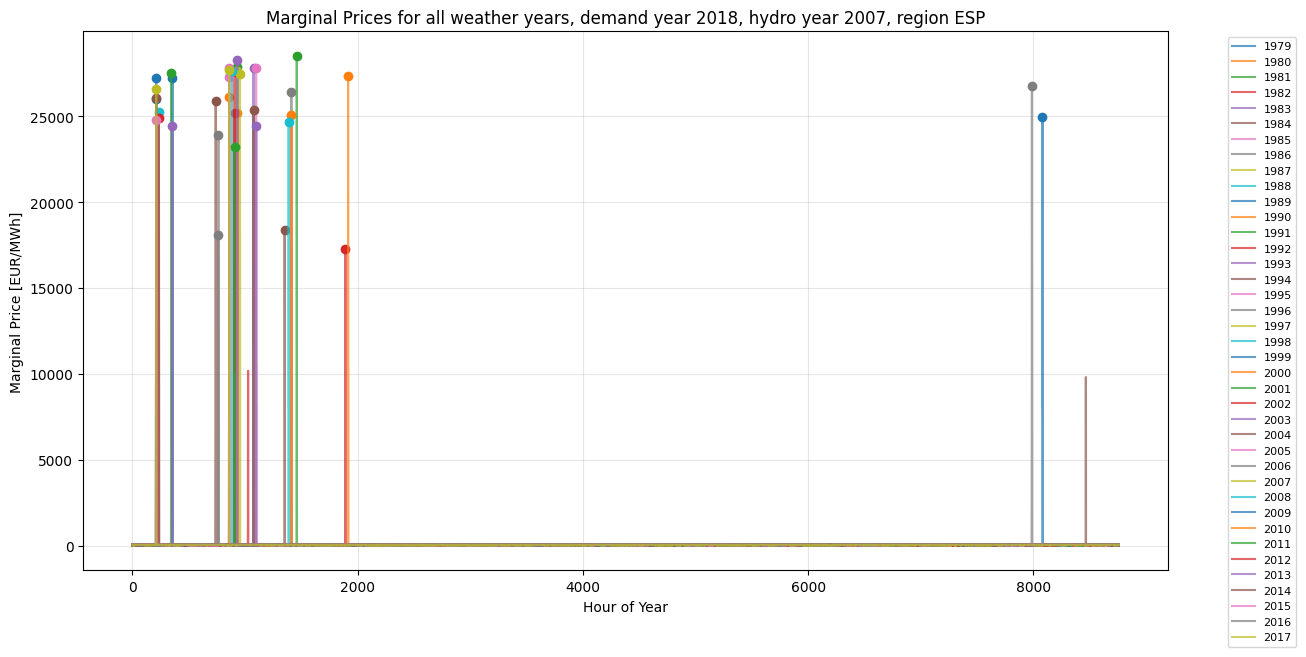

In [152]:
selected_network = networks_exp_2

max_MP_list = []
max_MP_time_list = []


plt.figure(figsize=(14, 7))
for i, year in enumerate(weather_years):
    if year in selected_network:
        net = selected_network[year]
        price = net.buses_t.marginal_price["electricity bus"]
        plt.plot(range(len(price)), price.values, label=str(year), alpha=0.7)
        # Mark the max value with a dot
        max_idx = price.values.argmax()
        max_val = price.values[max_idx]
        max_time = price.index[max_idx]
        max_MP_list.append(max_val)
        max_MP_time_list.append(max_time)
        plt.plot(max_idx, max_val, 'o', color=plt.gca().lines[-1].get_color())

plt.xlabel("Hour of Year")
plt.ylabel("Marginal Price [EUR/MWh]")
plt.title(f"Marginal Prices for all weather years, demand year {d_year_exp}, hydro year {h_year_exp}, region {region}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()


In [153]:
prices_1 = list(unique_prices(networks_exp_1[1995]))
prices_2 = list(unique_prices(networks_exp_2[1995]))
prices_3 = list(unique_prices(networks_exp_3[1995]))

print("Unique marginal prices for original network (1995):", prices_1)
print("Number of unique prices in original network (1995):", len(prices_1))
print("Unique marginal prices for network w mc hydro (1995):", prices_2)
print("Number of unique prices in network w mc hydro (1995):", len(prices_2))
print("Unique marginal prices for network w gas noise + hydro mc (1995):", prices_3)
print("Number of unique prices in network w gas noise + hydro mc (1995):", len(prices_3))


Unique marginal prices for original network (1995): [1.5, 1.7, 16.1, 39.9, 59.7, 65.4, 8023.4, 11975.8, 28936.8]
Number of unique prices in original network (1995): 9
Unique marginal prices for network w mc hydro (1995): [1.5, 1.7, 1.8, 31.6, 65.6, 66.6, 68.2, 71.9, 73.0, 1452.1, 10150.1, 27279.5]
Number of unique prices in network w mc hydro (1995): 12
Unique marginal prices for network w gas noise + hydro mc (1995): [1.5, 1.8, 5.3, 71.0, 73.0, 73.0, 48812.7]
Number of unique prices in network w gas noise + hydro mc (1995): 7


# mu values 

In [112]:
N_test_class = Build_network_capacity_exp_gas(weather_year=2005, hydro_year=h_year_exp, demand_year=d_year_exp, data=All_data, cost_data=Cost, setup=setup_exp)
N_test = N_test_class.network

N_test.optimize(solver_name="gurobi", assign_all_duals=True)



Writing continuous variables.: 100%|██████████| 11/11 [00:00<00:00, 39.33it/s]


Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-20
Read LP format model from file C:\Users\jonat\AppData\Local\Temp\linopy-problem-7sr08ujb.lp
Reading time = 0.55 seconds
obj: 262809 rows, 131409 columns, 503882 nonzeros
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: AMD Ryzen 7 5700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 262809 rows, 131409 columns and 503882 nonzeros
Model fingerprint: 0xb1636ecb
Coefficient statistics:
  Matrix range     [1e-03, 1e+00]
  Objective range  [1e-02, 2e+05]
  Bounds range     [6e+02, 6e+03]
  RHS range        [6e+02, 2e+07]
Presolve removed 153483 rows and 22424 columns
Presolve time: 0.34s
Presolved: 109326 rows, 108985 columns, 327975 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time

('ok', 'optimal')

In [113]:
print_Results(N_test)
unique_prices(N_test)



Objective value (MEUR): 13090

Installed generator capacities (MW):
Generator
OCGT      19827.0
onwind    61826.0
solar     18704.0

Installed store energy capacities (MWh):
Store
battery storage     3909.0
Hydrogen storage       0.0

Installed hydro power capacity (MW):
StorageUnit
Reservoir hydro storage    12700.0

Installed link power capacities (MW):
Link
battery charge        752.0
battery discharge    2134.0
electrolysis            0.0
fuel cell               0.0


[1.5,
 1.7,
 1.7,
 1.8,
 45.6,
 49.2,
 54.0,
 54.6,
 60.3,
 65.9,
 66.1,
 72.5,
 10626.6,
 27659.3]

In [138]:
net = networks_exp_2[2000]
print(f"Years run run in N_test: in {net.snapshots[0].year} hydro year: {h_year_exp} & demand year: {d_year_exp}")
for gen in net.generators.index:
    mu_upper = net.generators_t.mu_upper[gen] if 'mu_upper' in net.generators_t and gen in net.generators_t.mu_upper else None
    mu_lower = net.generators_t.mu_lower[gen] if 'mu_lower' in net.generators_t and gen in net.generators_t.mu_lower else None
    print(f"Generator: {gen}")
    if mu_upper is not None:
        print(f"  mu_upper: min={mu_upper.min():.2f}, max={mu_upper.max():.2f}")
    else:
        print("  mu_upper: N/A")
    if mu_lower is not None:
        print(f"  mu_lower: min={mu_lower.min():.2f}, max={mu_lower.max():.2f}")
    else:
        print("  mu_lower: N/A")
    print()

Years run run in N_test: in 2000 hydro year: 2007 & demand year: 2018
Generator: OCGT
  mu_upper: min=-24996.58, max=0.00
  mu_lower: min=-0.00, max=79.46

Generator: onwind
  mu_upper: min=-25076.04, max=0.00
  mu_lower: min=0.00, max=0.00

Generator: solar
  mu_upper: min=-25077.54, max=-1.50
  mu_lower: min=0.00, max=0.00



## Extreme events capacity expansion model

In [129]:
Extreme_periods_exp_model = {}

for year in weather_years:
    net_name = networks_exp_2[year].name
    net = networks_exp_2[year]

    # Safety check
    if not hasattr(net, "objective") or net.objective == 0:
        print(f"Warning: {net_name} has no valid objective. Skipping.")
        continue

    # Dynamic threshold = 15% of the total system cost
    T = 0.15 * (net.buses_t["marginal_price"]["electricity bus"] * net.loads_t["p_set"]["load"]).sum()

    # Run detection
    extreme_periods = global_difficult_periods(
        net,
        min_length=24 * 2,
        max_length=24 * 14,
        T=T
    )

    Extreme_periods_exp_model[year] = extreme_periods

    # Print results for this year
    print(f"\nYear {year} - {len(extreme_periods)} extreme periods found:")
    for p in extreme_periods:
        print(f"  Period: {p.period}, Peak hour: {p.peak_hour}")



Year 1979 - 1 extreme periods found:
  Period: [1979-01-12 15:00:00, 1979-01-20 08:00:00], Peak hour: 1979-01-12 15:00:00

Year 1980 - 1 extreme periods found:
  Period: [1980-02-01 05:00:00, 1980-02-08 12:00:00], Peak hour: 1980-02-01 05:00:00

Year 1981 - 1 extreme periods found:
  Period: [1981-02-06 06:00:00, 1981-02-12 21:00:00], Peak hour: 1981-02-06 06:00:00

Year 1982 - 1 extreme periods found:
  Period: [1982-02-04 19:00:00, 1982-02-11 19:00:00], Peak hour: 1982-02-04 19:00:00

Year 1983 - 1 extreme periods found:
  Period: [1983-02-13 06:00:00, 1983-02-23 23:00:00], Peak hour: 1983-02-13 06:00:00

Year 1984 - 0 extreme periods found:

Year 1985 - 1 extreme periods found:
  Period: [1985-02-15 07:00:00, 1985-02-26 21:00:00], Peak hour: 1985-02-15 07:00:00

Year 1986 - 1 extreme periods found:
  Period: [1986-11-25 09:00:00, 1986-12-05 23:00:00], Peak hour: 1986-11-25 09:00:00

Year 1987 - 1 extreme periods found:
  Period: [1987-02-02 05:00:00, 1987-02-09 00:00:00], Peak hour

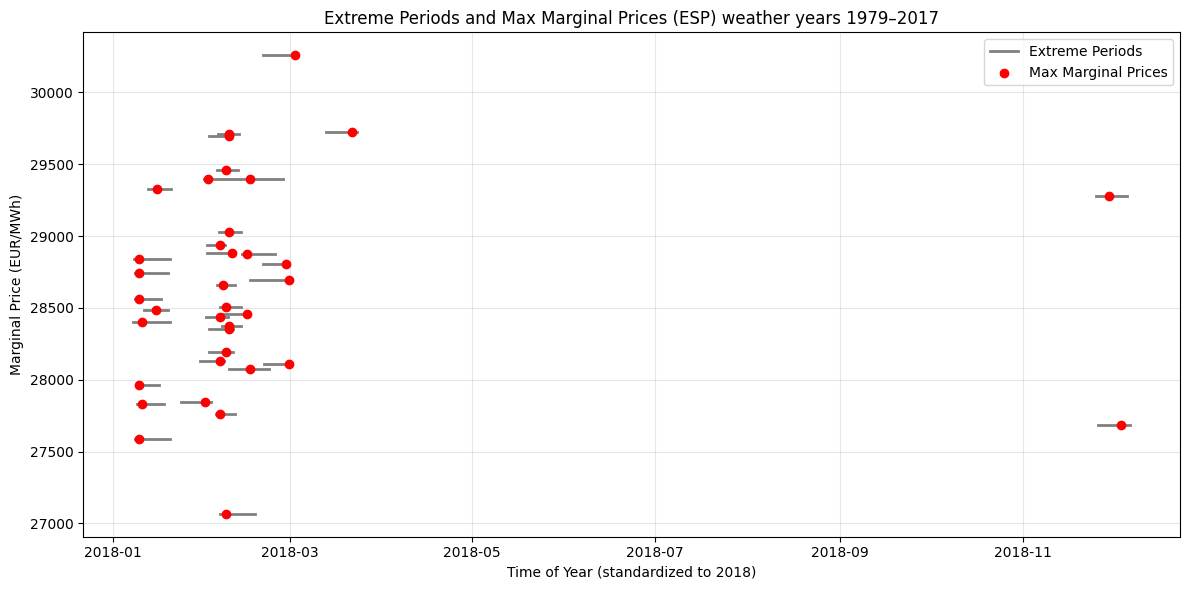

In [132]:

plot_extreme_period(
    networks_by_year=networks_exp_2,                    # e.g. {1995: Network, 1996: Network, ...}
    extreme_periods_by_year=Extreme_periods_exp_model,
    region=region,
    standard_year=2018,
    bus_name="electricity bus",
    periods_per_year=1
)

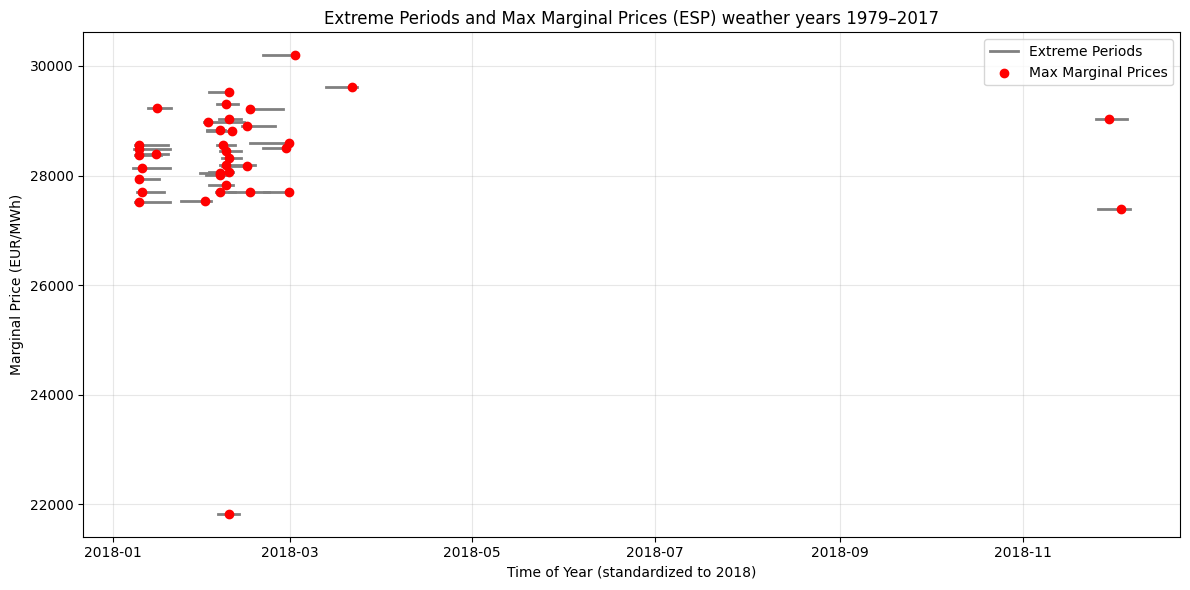

In [133]:
plot_extreme_period(
    networks_by_year=networks_exp_3,                    # e.g. {1995: Network, 1996: Network, ...}
    extreme_periods_by_year=Extreme_periods_exp_model,
    region=region,
    standard_year=2018,
    bus_name="electricity bus",
    periods_per_year=1
)

## Unique marginal prices in EXP model

In [134]:

print(unique_prices(networks_exp_2[1995]), "with mc for hydro")
print(unique_prices(networks_exp_1[1995]), "w.o mc for hydro")

[1.5, 1.7, 1.8, 9.4, 39.6, 59.7, 65.4, 8024.4, 11975.3, 28936.3] with mc for hydro
[1.5, 1.7, 16.1, 39.9, 59.7, 65.4, 8023.4, 11975.8, 28936.8] w.o mc for hydro


In [136]:
print("for w_year: ", 2000)
print(unique_prices(networks_exp_3[2000]), "with gas noise")
print(unique_prices(networks_exp_2[2000]), "with gas noise 2")
print(unique_prices(networks_exp_1[2000]), "w.o mc for hydro")

for w_year:  2000
[1.5, 1.7, 1.8, 27.0, 27.1, 29.8, 31.2, 44.0, 44.0, 60.6, 66.4, 72.8, 10607.4, 27692.0] with gas noise
[1.5, 1.7, 1.7, 1.8, 8.1, 19.4, 53.2, 73.8, 73.8, 74.0, 81.0, 81.0, 88.8, 88.8, 7971.9, 25077.5] with gas noise 2
[1.5, 1.7, 14.9, 58.5, 59.7, 65.4, 71.7, 9829.5, 10961.3, 28113.6] w.o mc for hydro


In [97]:
# COST CHECK FOR MARGINAL PRICES: 
print(N_test_class.costs.at["solar", "marginal_cost"])
# for wind 
print(N_test_class.costs.at["onwind", "marginal_cost"])

0.0106
1.508


### Compare unique prices in exp models 

In [ ]:
# Compare with maarginal cost for hydro and from before
avg_unique_mc_list_1 = []
avg_unique_mc_list_2 = []
std_unique_mc_list_1 = []
std_unique_mc_list_2 = []



for year in weather_years:
    avg_unique_mc_list_1.append(float(np.mean(unique_prices(networks_exp_1[year])).round(1)))
    avg_unique_mc_list_2.append(float(np.mean(unique_prices(networks_exp_2[year])).round(1)))
    std_unique_mc_list_1.append(np.std(unique_prices(networks_exp_1[year])))
    std_unique_mc_list_2.append(np.std(unique_prices(networks_exp_2[year])))


In [ ]:
[avg_unique_mc_list_1[i]-avg_unique_mc_list_2[i] for i in range(len(avg_unique_mc_list_1))]

In [ ]:
[std_unique_mc_list_1[i] - std_unique_mc_list_2[i] for i in range(len(std_unique_mc_list_1))]

# Run model for one year

In [116]:
N_class_bat = Build_network_capacity_exp_bat_S_unit(weather_year=2005, hydro_year=2007, demand_year=d_year_exp, data=All_data, cost_data=Cost, setup=setup_exp)
#N_class = Build_network_capacity_exp(weather_year=w_year_exp, hydro_year=h_year_exp, demand_year=d_year_exp, data=All_data, cost_data=Cost, setup=setup_exp)
#N = N_class.network
N_bat = N_class_bat.network

#silent_optimize(N)
#silent_optimize(N_bat)
N_bat.optimize(solver_name="gurobi", assign_all_duals=True)

#print_Results(N)
print_Results(N_bat)



Writing continuous variables.: 100%|██████████| 12/12 [00:00<00:00, 41.53it/s]


Set parameter Username
Academic license - for non-commercial use only - expires 2025-11-20
Read LP format model from file C:\Users\jonat\AppData\Local\Temp\linopy-problem-0n28qi6v.lp
Reading time = 0.53 seconds
obj: 254047 rows, 122647 columns, 486360 nonzeros
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: AMD Ryzen 7 5700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 254047 rows, 122647 columns and 486360 nonzeros
Model fingerprint: 0xf88454de
Coefficient statistics:
  Matrix range     [1e-03, 4e+00]
  Objective range  [1e-02, 2e+05]
  Bounds range     [6e+02, 6e+03]
  RHS range        [6e+02, 2e+07]
Presolve removed 144721 rows and 13664 columns
Presolve time: 0.34s
Presolved: 109326 rows, 108983 columns, 327975 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time

In [117]:
unique_prices(N_bat)

[1.5, 23.0, 63.8, 65.4, 48805.1]

In [118]:
net = N_bat
print(f"Years run run in N_test: in {net.snapshots[0].year} hydro year: {h_year_exp} & demand year: {d_year_exp}")
for gen in net.generators.index:
    mu_upper = net.generators_t.mu_upper[gen] if 'mu_upper' in net.generators_t and gen in net.generators_t.mu_upper else None
    mu_lower = net.generators_t.mu_lower[gen] if 'mu_lower' in net.generators_t and gen in net.generators_t.mu_lower else None
    print(f"Generator: {gen}")
    if mu_upper is not None:
        print(f"  mu_upper: min={mu_upper.min():.2f}, max={mu_upper.max():.2f}")
    else:
        print("  mu_upper: N/A")
    if mu_lower is not None:
        print(f"  mu_lower: min={mu_lower.min():.2f}, max={mu_lower.max():.2f}")
    else:
        print("  mu_lower: N/A")
    print()

Years run run in N_test: in 2005 hydro year: 2007 & demand year: 2018
Generator: OCGT
  mu_upper: min=-48739.70, max=0.00
  mu_lower: min=0.00, max=63.92

Generator: onwind
  mu_upper: min=-48803.61, max=0.00
  mu_lower: min=0.00, max=0.00

Generator: solar
  mu_upper: min=-48805.11, max=-1.50
  mu_lower: min=0.00, max=0.00



# Network class for quick edits

In [41]:
class Build_network_capacity_exp:
    def __init__(
        self,
        weather_year: int = 2011,
        hydro_year: int = 2011,
        demand_year: int = 2018,
        data: dict = None,
        cost_data: tuple = None,
        setup: dict = None
    ):
        if setup is None:
            setup = {
                'NOR': {
                    'OCGT': True,
                    'CCGT': False,
                    'battery storage': True,
                    'onwind': True,
                    'offwind': False,
                    'solar': True,
                    'electrolysis': True,
                    'fuel cell': True,
                    'Hydrogen storage': True,
                    'Reservoir hydro storage': True,
                    'load shedding': True
                }
            }

        self.weather_year = weather_year
        self.hydro_year = hydro_year
        self.demand_year = demand_year
        self.setup = setup
        self.region = list(setup.keys())[0]  # Single region expected

        self.costs = cost_data.costs
        self.cost_units = cost_data.units

        self.all_data = data if data is not None else load_all_data()
        self.data_dict = {self.region: self.extract_data(self.region, self.weather_year, self.hydro_year, self.demand_year)}
        
        self.network = pypsa.Network()
        self.hours_in_year = pd.date_range(f'{weather_year}-01-01 00:00', f'{weather_year}-12-31 23:00', freq='h')
        if len(self.hours_in_year) > 8760:
            self.hours_in_year = self.hours_in_year[self.hours_in_year.strftime('%m-%d') != '02-29']
        self.network.set_snapshots(self.hours_in_year.values)

        self.carriers = [
            'gas', 'onwind', 'offwind', 'solar',
            'battery charge', 'battery discharge', 'hydro',
            'electrolysis', 'fuel cell', 'hydrogen', 'load shedding'
        ]

        self.colors = {
            'gas': 'gray', 'onwind': 'lightblue', 'offwind': 'dodgerblue', 'load shedding': 'red',
            'solar': 'orange', 'battery charge': 'gold', 'battery discharge': 'darkorange',
            'electrolysis': 'green', 'fuel cell': 'limegreen', 'hydrogen': 'deepskyblue', 'hydro': 'slateblue'
        }

        self.network.add("Carrier",
            self.carriers,
            color=[self.colors[c] for c in self.carriers],
            co2_emissions=[self.costs.at[c, "CO2 intensity"] if c in self.costs.index else 0.0 for c in self.carriers]
        )


        self.network.add("Bus", 'electricity bus')
        self.network.add("Bus", 'hydrogen bus')
        self.network.add("Load", 'load',
                         bus='electricity bus',
                         p_set=self.data_dict[self.region]['demand'].values.flatten()
                         )


        technologies = self.setup[self.region].keys()
        for tech in technologies:
            if not self.setup[self.region][tech]:
                continue

            if tech in ['OCGT', 'CCGT']:
                self.network.add("Generator", tech,
                    bus='electricity bus',
                    p_nom_extendable=True,
                    carrier='gas',
                    capital_cost=self.costs.at[tech, "capital_cost"],
                    marginal_cost=self.costs.at[tech, "marginal_cost"]  # + 1.6 * np.random.uniform(1, 10) # Adding small random cost to break symmetry
                    )

            elif tech == 'load shedding':
                self.network.add("Generator", tech,
                    bus="electricity bus",
                    p_nom_extendable=True,
                    marginal_cost=2000,   # €/MWh, can adjust based on VoLL
                    capital_cost=0,
                    carrier="load shedding"
                    )
                
            elif tech == 'solar':
                self.network.add("Generator", tech,
                    bus='electricity bus',
                    p_nom_extendable=True,
                    carrier='solar',
                    capital_cost=self.costs.at[tech, "capital_cost"],
                    marginal_cost=self.costs.at[tech, "marginal_cost"],
                    p_max_pu=self.data_dict[self.region]['solar'].values.flatten()
                    )

            elif tech == 'onwind':
                self.network.add("Generator", tech,
                    bus='electricity bus',
                    p_nom_extendable=True,
                    carrier='onwind',
                    capital_cost=self.costs.at[tech, "capital_cost"],
                    marginal_cost=self.costs.at[tech, "marginal_cost"],
                    p_max_pu=self.data_dict[self.region]['onwind'].values.flatten()
                    )

            elif tech == 'offwind':
                self.network.add("Generator", tech,
                    bus='electricity bus',
                    p_nom_extendable=True,
                    carrier='offwind',
                    capital_cost=self.costs.at[tech, "capital_cost"],
                    marginal_cost=self.costs.at[tech, "marginal_cost"],
                    p_max_pu=self.data_dict[self.region]['offwind'].values.flatten()
                    )

            elif tech == 'battery storage':
                self.network.add("Bus", 'battery bus')

                self.network.add("Link", 'battery charge',
                    bus0='electricity bus',
                    bus1='battery bus',
                    carrier='battery charge',
                    p_nom_extendable=True,
                    capital_cost=self.costs.at["battery inverter", "capital_cost"]/2,    # Divide by two as only one inverter will be baught in reality
                    efficiency=self.costs.at["battery inverter", "efficiency"]
                    )

                self.network.add("Link", 'battery discharge',
                    bus0='battery bus',
                    bus1='electricity bus',
                    carrier='battery discharge',
                    p_nom_extendable=True,
                    capital_cost=self.costs.at["battery inverter", "capital_cost"]/2,     # Divide by two as only one inverter will be baught in reality
                    efficiency=self.costs.at["battery inverter", "efficiency"]
                    )        

                self.network.add("Store", tech,
                    bus='battery bus',
                    e_nom_extendable=True,
                    e_cyclic=False,
                    capital_cost=self.costs.at[tech, "capital_cost"]
                    )

            elif tech == 'electrolysis':
                self.network.add("Link", tech,
                    bus0='electricity bus',
                    bus1='hydrogen bus',
                    carrier='electrolysis',
                    p_nom_extendable=True,
                    capital_cost=self.costs.at[tech, "capital_cost"],
                    efficiency=self.costs.at[tech, "efficiency"]
                    )

            elif tech == 'fuel cell':
                self.network.add("Link", tech,
                    bus0='hydrogen bus',
                    bus1='electricity bus',
                    carrier='fuel cell',
                    p_nom_extendable=True,
                    capital_cost=self.costs.at[tech, "capital_cost"],
                    efficiency=self.costs.at[tech, "efficiency"]
                    )

            elif tech == 'Hydrogen storage':
                self.network.add("Store", tech,
                    bus='hydrogen bus',
                    e_nom_extendable=True,
                    e_cyclic=False,
                    #capital_cost=self.costs.at["hydrogen storage underground", "capital_cost"],
                    capital_cost=self.costs.at["H2 (l) storage tank", "capital_cost"],
                    carrier='hydrogen storage'
                    )
                
            elif tech == 'Reservoir hydro storage':
                self.network.add("StorageUnit", tech,
                    bus='electricity bus',
                    carrier='hydro',
                    p_nom_extendable=False,
                    p_nom = 12700,  # 12 GW
                    max_hours=1300,
                    efficiency_store=0,
                    efficiency_dispatch=self.costs.at["Pumped-Storage-Hydro-bicharger", "efficiency"],
                    cyclic_state_of_charge=False,
                    state_of_charge_initial= (12700 * 1300)*0.3 ,  # Initial storage capacity in MWh
                    inflow=self.data_dict[self.region]['hydro'].values.flatten(),
                    marginal_cost=self.costs.at["onwind", "marginal_cost"]*1.2,  # higher than wind to prioritize wind usage
                    capital_cost=0
                    )

    def extract_data(self, region: str, weather_year: int, hydro_year: int, demand_year: int):
        extracted = {}
        if demand_year not in self.all_data["demand"].index.year:
            print(f"Demand year {demand_year} not in data. Using 2017 instead.")
            demand_year = 2017
        if weather_year not in self.all_data["solar"].index.year:
            print(f"Weather year {weather_year} not in data. Using 2012 instead.")
            weather_year = 2012
        if hydro_year not in self.all_data["hydro_inflow"].index.year:
            print(f"Hydro year {hydro_year} not in data. Using 2011 instead.")
            hydro_year = 2011

        if region in self.all_data["demand"].columns:
            demand_series = self.all_data["demand"].loc[self.all_data["demand"].index.year == demand_year, region]
            extracted["demand"] = demand_series[demand_series.index.strftime('%m-%d') != '02-29'][:8760]

        for carrier in ["solar", "onwind", "offwind"]:
            if region in self.all_data[carrier].columns:
                weather_series = self.all_data[carrier].loc[self.all_data[carrier].index.year == weather_year, region]
                extracted[carrier] = weather_series[weather_series.index.strftime('%m-%d') != '02-29'][:8760]

        if region in self.all_data["hydro_inflow"].columns:
            hydro_series = self.all_data["hydro_inflow"].loc[self.all_data["hydro_inflow"].index.year == hydro_year, region]
            extracted["hydro"] = hydro_series[hydro_series.index.strftime('%m-%d') != '02-29'][:8760]

        return extracted  
